# Studio Dati COVID-19

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
pd.set_option('mode.chained_assignment', None)

Fonte Dati: https://github.com/pcm-dpc/COVID-19/tree/master/dati-json 

# Province 

Fonte Dati: https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-province.json

In [52]:
df_province = pd.read_json('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-province.json')

In [53]:
for i in range(len(df_province)):
    df_province['data'][i] = df_province['data'][i][0:10]
for i in range(len(df_province)):
    df_province['data'][i] = pd.to_datetime(df_province['data'][i])

## Studio Provincia di Prato

In [54]:
df_prato = df_province[df_province['denominazione_provincia'] == "Prato"]
df_prato.reset_index(inplace = True)
df_prato.drop("index", axis = 1)
df_prato = df_prato[["data", "totale_casi"]]

### Funzione Cumultativa

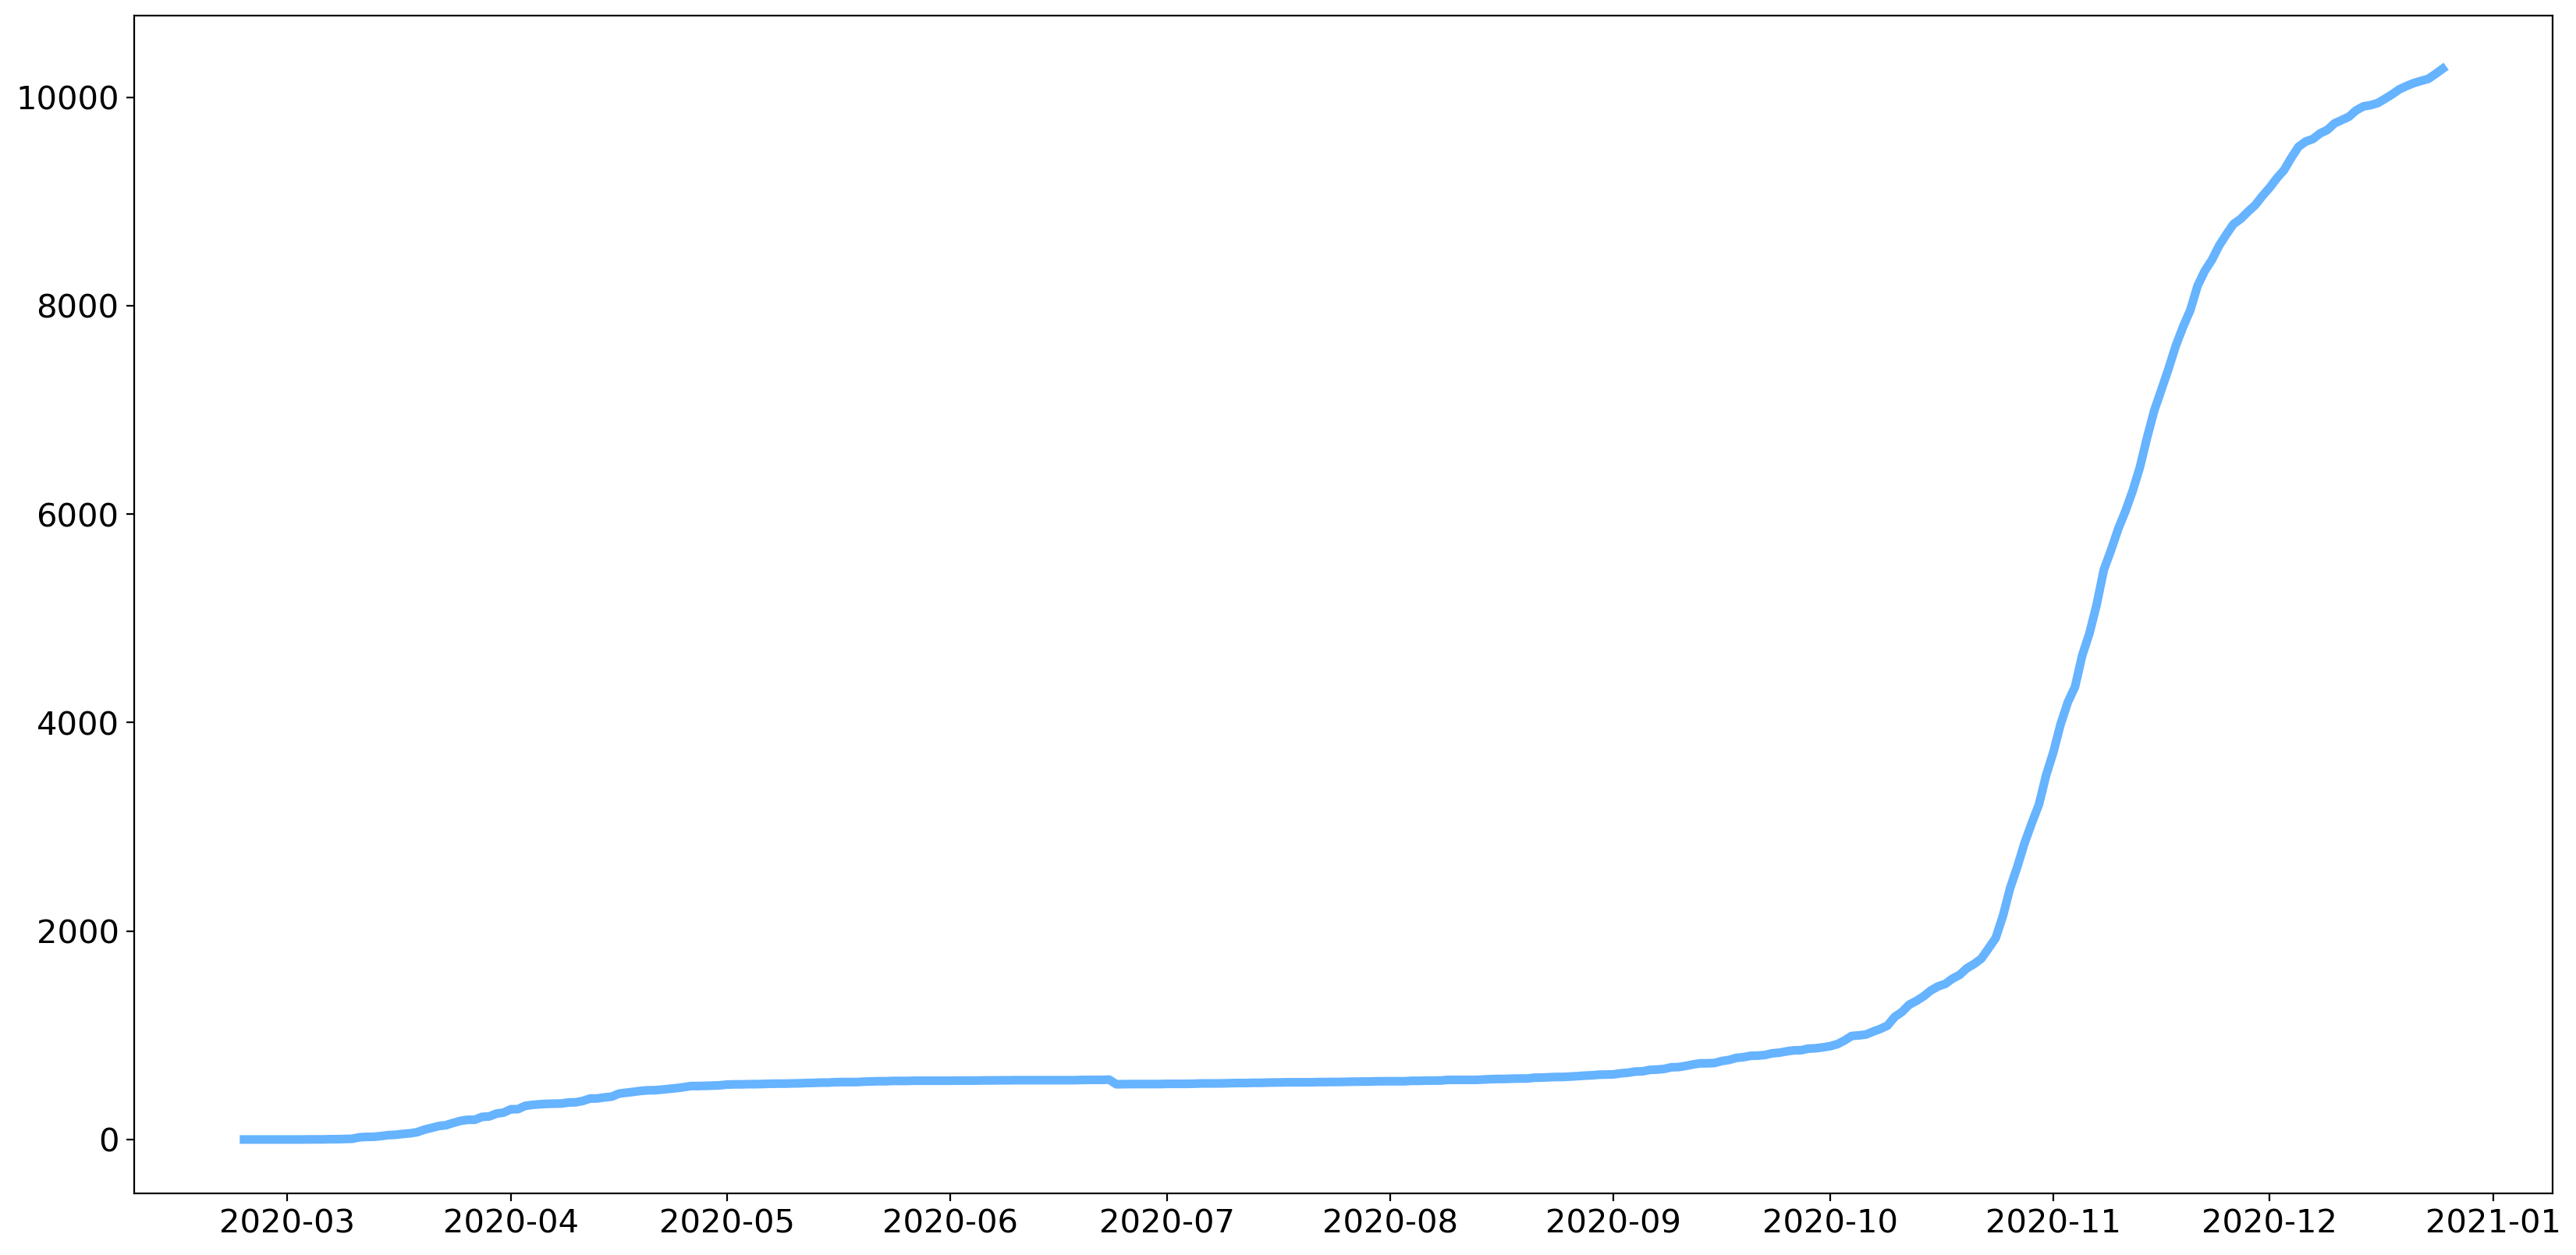

In [186]:
plt.figure(figsize = (20,10), dpi = 200)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.plot(df_prato['data'], df_prato['totale_casi'], color = "#66b3ff", linewidth = 4)
plt.show()

In [81]:
casi_prato = []
for i in range(len(df_prato)):
    if i == 0:
        casi_prato.append(i)
    else:
        # modifcica dei dati
        if df_prato['totale_casi'][i] - df_prato['totale_casi'][i-1] >= 0:
            casi_prato.append(df_prato['totale_casi'][i] - df_prato['totale_casi'][i-1])
        else:
            casi_prato.append(0)

#### Nella posizione numero 121 ci sono stati meno casi (cumulati) di quelli del giorno precedente. Dato non congruo.

In [94]:
# Inseriamo la nuova lista nel nostro dataframe
df_prato['casi_giornalieri'] = casi_prato

# Casi Giornalieri

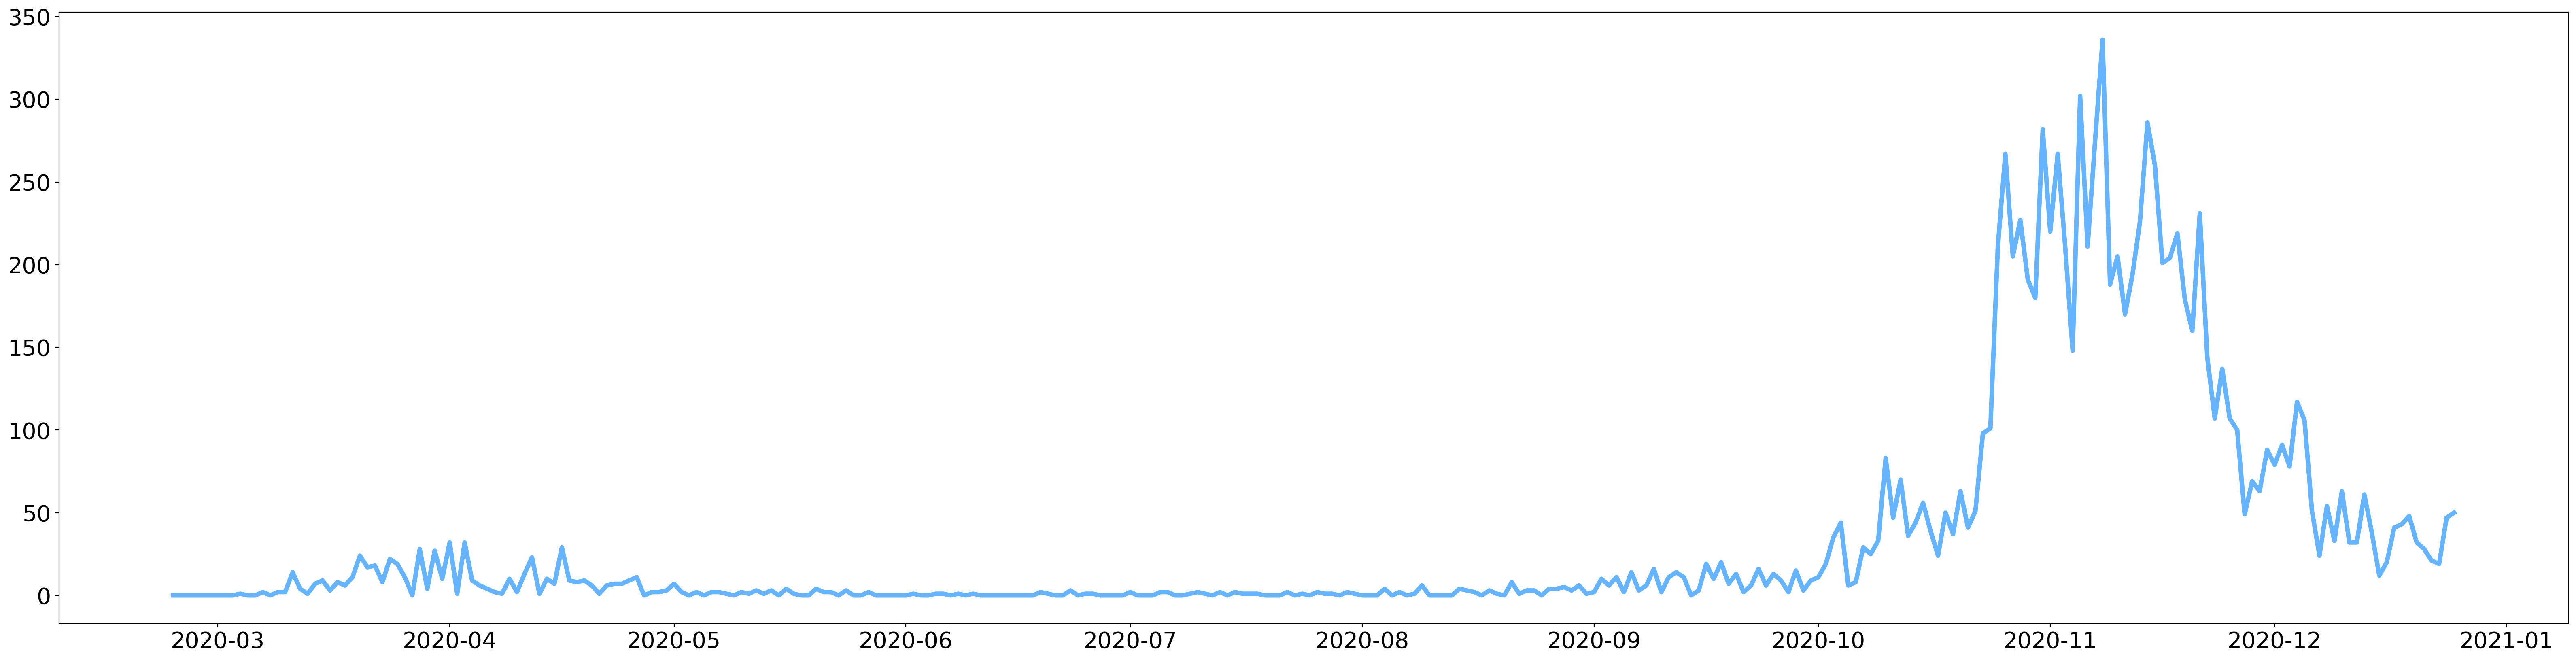

In [168]:
plt.figure(figsize = (40,10), dpi = 200)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.plot(df_prato['data'], df_prato['casi_giornalieri'], color = "#66b3ff", linewidth = 4)
plt.show()

# Grafico Interattivo

In [181]:
fig = go.Figure()
fig.add_traces(go.Scatter(x = df_prato['data'], y = df_prato['casi_giornalieri'], name = "Casi",
                         line=dict(color='#5487ff', width=1.5), hoverinfo='name+y'))
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    template = "simple_white",
    xaxis_title='Data',
    yaxis_title='Numero di Casi',
    hovermode="x unified",
)
fig.show()

In [ ]:
## continua...